# Partie 1 - Manipulations de base avec OpenCV

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import time

## Charger une image

In [2]:
image = cv.imread("data/image.jpeg")

cv.imshow("Loading an image", image)
cv.waitKey(0)
cv.destroyAllWindows()

## Capturer le flux vidéo ou d'une caméra

In [3]:
# Simulation d'un flux video avec un fichier mp4
video = cv.VideoCapture("data/video.mp4")

frameRate = 60
period = 1000/frameRate

while (video.isOpened()):
    returnValue, frame = video.read()
    
    if not returnValue:
        break

    cv.imshow("Captured frame", frame)
    cv.waitKey(int(period))

cv.destroyAllWindows()


## Séparer les canaux d'une image et visualiser chacun séparement

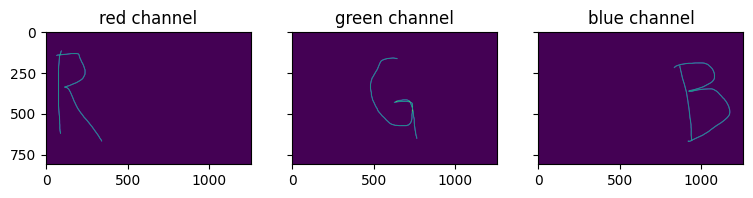

In [4]:
image = cv.imread("data/rgb.png")

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

rChannel = image[:, :, 0]
gChannel = image[:, :, 1]
bChannel = image[:, :, 2]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 6), sharex=True, sharey=True)

axs[0].imshow(rChannel)
axs[0].set_title("red channel")
axs[1].imshow(gChannel)
axs[1].set_title("green channel")
axs[2].imshow(bChannel)
axs[2].set_title("blue channel")

plt.show()

## Convertir une image RGB en niveau de gris, en HSV, en BGR, ...

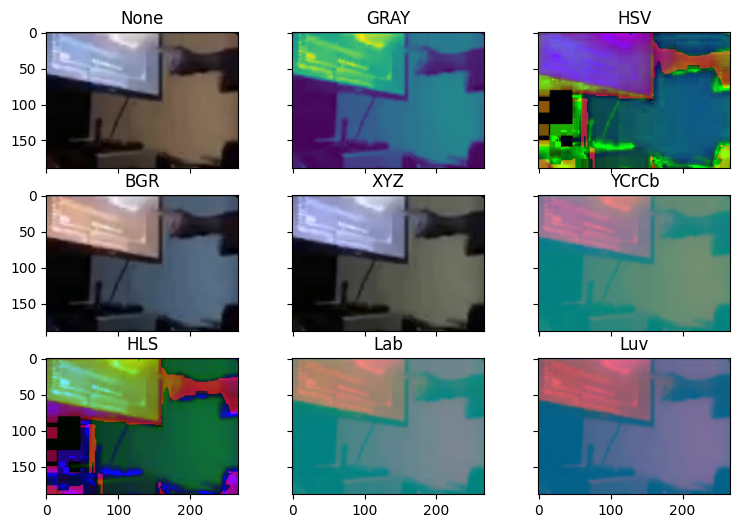

In [5]:
image = cv.imread("data/image.jpeg")

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

colorSpace = ("None", cv.COLOR_RGB2GRAY, cv.COLOR_RGB2HSV, cv.COLOR_RGB2BGR, cv.COLOR_RGB2XYZ, cv.COLOR_RGB2YCrCb, cv.COLOR_RGB2HLS, cv.COLOR_RGB2Lab, cv.COLOR_RGB2Luv)
colorSpaceName = ("None", "GRAY", "HSV", "BGR", "XYZ", "YCrCb", "HLS", "Lab", "Luv")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 6), sharex=True, sharey=True)
for ax, method, methodStr in zip(axs.flat, colorSpace, colorSpaceName):
    processedImage = image
    if method != "None":
        processedImage = cv.cvtColor(image, method)
        
    ax.imshow(processedImage)
    ax.set_title(methodStr)
    
cv.cvtColor(image, cv.COLOR_Luv2BGR)

plt.show()

## Modifier la taille d'une image

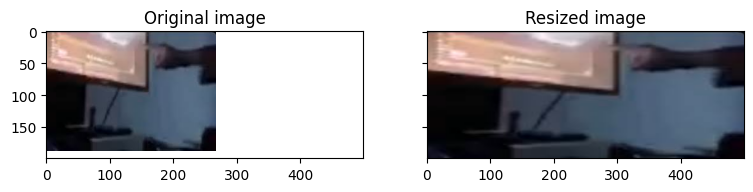

In [6]:
image = cv.imread("data/image.jpeg")

resizedImage = cv.resize(image, (500, 200))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 6), sharex=True, sharey=True)
axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(resizedImage)
axs[1].set_title("Resized image")

plt.show()

## Faire une rotation d'une image

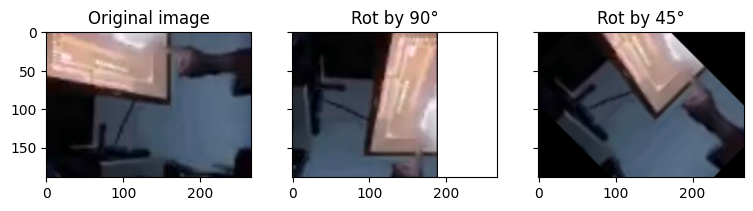

In [7]:
image = cv.imread("data/image.jpeg")

rotatedImage = cv.rotate(image, cv.ROTATE_90_CLOCKWISE)

rows, cols, _ = image.shape

M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0), -45, 1)
rotatedImage2 = cv.warpAffine(image, M, (cols, rows))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 6), sharex=True, sharey=True)
axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(rotatedImage)
axs[1].set_title("Rot by 90°")
axs[2].imshow(rotatedImage2)
axs[2].set_title("Rot by 45°")

plt.show()

## Flouter une image avec des filtres Gaussien ou Médian

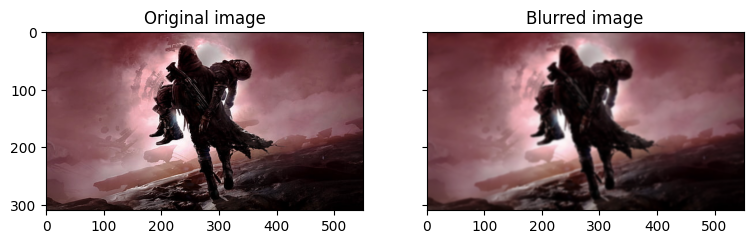

In [8]:
image = cv.imread("data/image2.jpg") 

blurredImage = cv.GaussianBlur(image, (7, 7), 0)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 6), sharex=True, sharey=True)
axs[0].imshow(image)
axs[0].set_title("Original image")
axs[1].imshow(blurredImage)
axs[1].set_title("Blurred image")

plt.show()

## Ajouter des dessins dans une image et dans un flux vidéo

In [9]:
image = cv.imread("data/image2.jpg")

cv.imshow("Loading image without rectangle", image)
cv.waitKey(3000)
cv.destroyAllWindows()

cv.rectangle(image, (180, 300), (400, 25), (0, 0, 255), 2)
cv.imshow("Loaded image with rectangle", image)
cv.waitKey(3000)

cv.destroyAllWindows()

video = cv.VideoCapture("video.mp4")

while (video.isOpened()):
    returnValue, frame = video.read()
    
    if not returnValue:
        break

    cv.ellipse(frame, (200, 100), (50, 20), 0, 0, 360, (0, 255, 0), 2)
    
    cv.imshow("Captured frame", frame)

    cv.waitKey(30)

cv.destroyAllWindows()

## Récupérer un clic dans une image ou vidéo

In [10]:
TYPE_WINDOW = (True) if "IMAGE" else "VIDEO" 

drawing = False
element = "circle"
oldPosX, oldPosY = -1, -1

def drawElement(event, x, y, flags, param):
    global drawing, element, oldPosX, oldPosY
    # global because they can't be given through params
    
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        oldPosX, oldPosY = x, y
        return
        
    if event == cv.EVENT_LBUTTONUP:
        drawing = False
        return
    
    if event == cv.EVENT_RBUTTONUP:
        element = "rectangle" if (element == "circle") else "circle"
        return
    
    if event == cv.EVENT_MOUSEMOVE:
        if not drawing:
            return
        
        if element == "circle":
            cv.circle(img, (x, y), 5, (0, 0, 255), -1)
            return
        
        cv.rectangle(img, (oldPosX, oldPosY), (x, y), (0, 255, 0), -1)


img = cv.imread("data/image2.jpg")
cv.namedWindow("Drawing_window")
cv.setMouseCallback("Drawing_window", drawElement)

# implement on video
# problem, overiding of the drawing, mask? 

while True:
    cv.imshow("Drawing_window", img)
    k = cv.waitKey(1) & 0xFF
    
    if k == ord("q"):
        break
        
cv.destroyAllWindows()

# Partie 2 - Traitement d'images avec OpenCV 

## Production et application d'un masque circulaire sur une image

In [14]:
import cv2 as cv
import numpy as np 
import random 
import matplotlib.pyplot as plt

image = cv.imread("data/hd2.webp")

cv.imshow("Image without mask", image)
cv.waitKey(0)
cv.destroyAllWindows()

allMask = np.zeros_like(image)

# make a mask out of 3 circles
for _, color in zip(range(3), ["R", "G", "B"]):
    random_radius = random.randrange(75, 150)
    random_x = random.randrange(0, image.shape[0])
    random_y = random.randrange(0, image.shape[1])

    allMask = cv.circle(allMask, (random_y, random_x), random_radius, (255, 255, 255), -1)
    
maskedImage = cv.bitwise_and(image, allMask)

# cv.imshow("General mask", allMask)
# cv.waitKey(0)
# cv.destroyAllWindows()
cv.imshow("Image masquee avec 3 cercles", maskedImage)
cv.imwrite("circleMaskedImage.png", maskedImage)
cv.waitKey(0)
cv.destroyAllWindows()

## Génération d'histogramme avant et après masquage

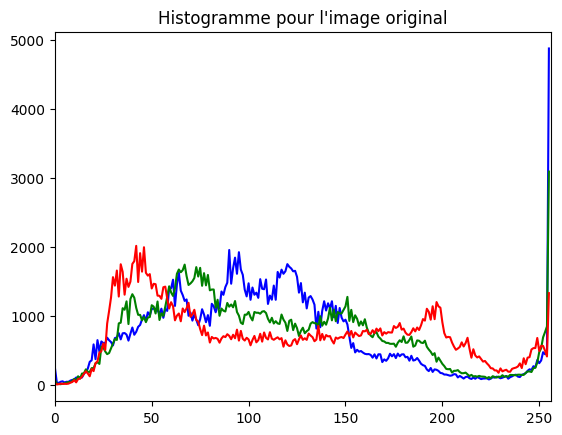

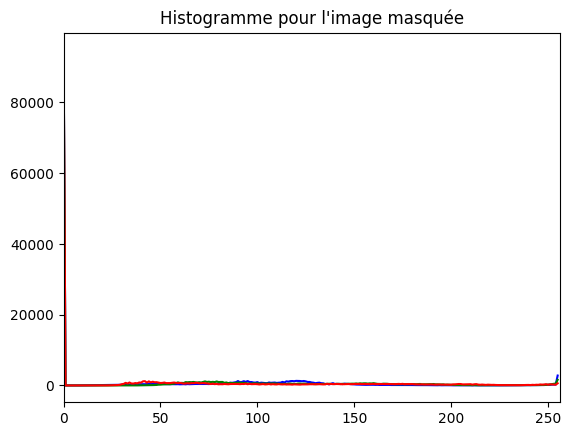

In [12]:
for i, col in enumerate(('b','g','r')):
    histr = cv.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.title("Histogramme pour l'image original")
    plt.xlim([0, 256])
plt.show()

for i, col in enumerate(('b','g','r')):
    histr = cv.calcHist([maskedImage], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.title("Histogramme pour l'image masquée")
    plt.xlim([0, 256])
plt.show()

## Détection de contours par gradients

(Text(0.5, 1.0, 'Sobel x and y'), ([], []), ([], []))

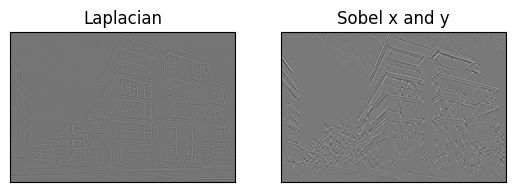

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

image = cv.imread('data/test.webp', cv.IMREAD_GRAYSCALE)
 
sobel = cv.Sobel(image, cv.CV_64F, 1, 1, ksize=5)
laplacian = cv.Laplacian(image, cv.CV_64F)
 
plt.subplot(1,2,1),plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(sobel, cmap = 'gray')
plt.title('Sobel x and y'), plt.xticks([]), plt.yticks([])

## Comparaison avec un filtrage Laplacien

Sur le filtre Laplacien, les coutours sont moins intenses mais plus compréhensibles pour les objets distants.

Tandis que le filtre Sobel (X et Y) est plus prononcé, mais devient confus lorsque les objets deviennent petits.

# Partie 3 - Détection des émotions d'une webcam

In [4]:
from __future__ import print_function
import cv2 as cv

def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
            
        #-- In each face, detect smile
        smiles = smile_cascade.detectMultiScale(faceROI, scaleFactor=2, minNeighbors=30)
        for (x2,y2,w2,h2) in smiles:
            smile_center = (x + x2 + w2//2, y + y2 + h2//2)
            frame = cv.ellipse(frame, smile_center, (w2//2, h2//2), 0, 0, 180, (0, 0, 255), 4)
            
    cv.imshow('Capture - Face and smile detection', frame)

haar_cascade_path = cv.data.haarcascades

face_cascade_name = haar_cascade_path + "haarcascade_frontalface_alt.xml"
eyes_cascade_name = haar_cascade_path + "haarcascade_eye_tree_eyeglasses.xml"
smile_cascade_name = haar_cascade_path + "haarcascade_smile.xml"

face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()
smile_cascade = cv.CascadeClassifier()

#-- 1. Load the cascades
if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
    
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
    print('--(!) Error loading eyes cascade')
    exit(0)
    
if not smile_cascade.load(cv.samples.findFile(smile_cascade_name)):
    print('--(!) Error loading smile cascade')
    exit(0)
    
#-- 2. Read the video stream
cap = cv.VideoCapture(0)
if not cap.isOpened:
    print('--(!) Error opening video capture')
    exit(0)
    
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    
    detectAndDisplay(frame)
    
    # Echap
    if cv.waitKey(10) == 27:
        break
    
cv.destroyAllWindows()

# Partie 4 - Applications CV - À vous de jouer

Sujet choisi: classification d'ASL (American Sign Language)